# Статистический анализ данных / Python
## Задание 1

**Правила:**

* Дедлайн **17 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

sns.set(font_scale=1.5, style='whitegrid')
blue = '#0099CC'

%matplotlib inline

### Задача 1. (5 баллов)

Пусть $X_1, ..., X_n$ --- выборка из равномерного распределения на отрезке $[0, \theta]$. На занятии было получено, что оценка $X_{(n)}$ является оценкой максимального правдоподобия параметра $\theta$. Покажите, что она является состоятельной оценкой $\theta$:

$$\mathsf{P}_{\theta}(X_{(n)} < \theta - \varepsilon) = ...$$

*Указание.* Вспомните определение $X_{(n)}$ и воспользуйтесь независимостью.

**Ответ:**

Так как:
1. $X_{(n)} = max(X_1, ..., X_n)$
2. $X_1, ..., X_n - i.i.d.$
3. $\mathsf{P}_{\theta}(X_i < \theta - \varepsilon)= F(\theta - \varepsilon) = (1 - \varepsilon/\theta)$
4. $(1 - \varepsilon/\theta) < 1$

Следовательно:
$\mathsf{P}_{\theta}(X_{(n)} < \theta - \varepsilon) = (1 - \varepsilon/\theta)^n\longrightarrow 0$ при $n\rightarrow\infty$

В чем практический смысл состоятельности?

**Ответ:** Для большого размера выборки состоятельная оценка сходится по вероятности к истинному значению (т.е. отклонение оценки может быть большим при некоторых реализациях выборки, но вероятность этого мала).

Оценка $X_{(n)}$ не является асимптотически нормальной, но в данном случае можно доказать свойство круче:
$$n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right).$$  
Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из равномерного распределения на отрезке $[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [2]:
samples_count = 300 # количество выборок
size = 500 # размер одной выборки

samples = sps.uniform().rvs((samples_count, size))
theta_hat = np.maximum.accumulate(samples, axis=1)
Tn = np.arange(1, size+1) * (1 - theta_hat)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.1`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

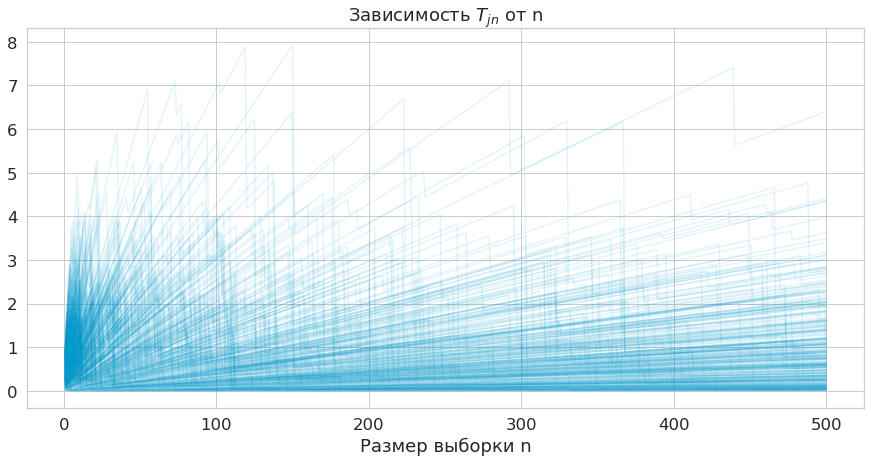

In [3]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(1, size+1), Tn[i], alpha=0.1, color=blue)
plt.title('Зависимость $T_{jn}$ от n')
plt.xlabel('Размер выборки n')
plt.show()

**Ответ:** Значения $T_{jn}$ не сходятся к константе. Но при этом можно заметить, что большинство значений $T_{jn}$ при больших n сконцентрированны около нуля. Уже здесь можно увидеть экспоненциальное распределение, но дальше на гистограмме видно еще лучше.

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

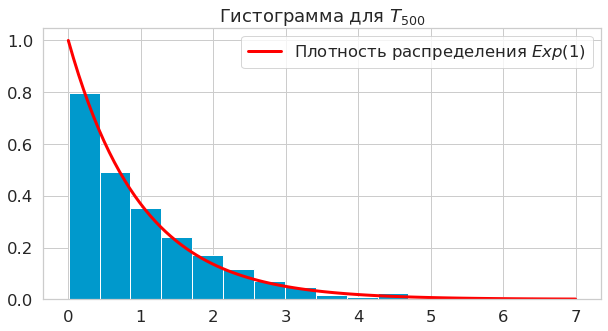

In [4]:
grid = np.linspace(0, 7, 100)

plt.figure(figsize=(10, 5))
plt.hist(Tn[:, -1], bins = 15, density=True, color=blue)
plt.title('Гистограмма для $T_{500}$')
plt.plot(grid, sps.expon().pdf(grid), lw=3, color='red',
         label='Плотность распределения $Exp(1)$')
plt.legend()
plt.show()

Сделайте вывод по задаче и ответьте на вопросы:
* Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? 
* Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$?
* Чем это свойство круче асимптотической нормальности и как это может быть полезно на практике?

**Вывод:** Гистограмма хорошо приближает плотность экспоненциального распределения $Exp(1)$.

Да, по графику и гистограмме можно сделать вывод, что $T_{jn}$  по распределению сходится к экспоненциальному.

Круче тем, что сходится быстрее. Асимптотически нормальная оценка сходится к параметру со скоростью ${1}\over{\sqrt{n}}$, а оценка с данным свойством сходится со скоростью ${1}\over{n}$.

### Задача 2. (5 баллов)
В этом задании нужно сделать оценку ОМП для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.


Скачайте данные по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/wine и загрузите их с помощью библиотеки pandas

In [5]:
df = pd.read_csv('wine.data',
                 names=['class_id', 'alcohol', 'malic_acid',
                        'ash', 'alcalinity_of_ash', 'magnesium',
                        'total_phenols', 'flavanoids',
                        'nonflavanoid_phenols', 'proanthocyanins',
                        'color_intensity', 'hue',
                        'od280/od315_of_diluted_wines', 'proline'])

Пусть выборка $(X_1, \dots, X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со вектором средних $\mu \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.
Можно показать, то оценками максимального правдоподобия являются
$$\widehat{\mu} = \overline{X},\ \ \ \widehat{\Sigma}=\frac{1}{n}\sum_{i=1}^n \left(X_i - \widehat{\mu}\right)\left(X_i - \widehat{\mu}\right)^T$$

Рассмотрим колонки "Alcalinity of ash", "Proanthocyanins", "Hue". Предположим, что
данные в них образуют выборку из многомерного нормального распределения с неизвестными
параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что
данные визуально похожи на нормальное распределение:

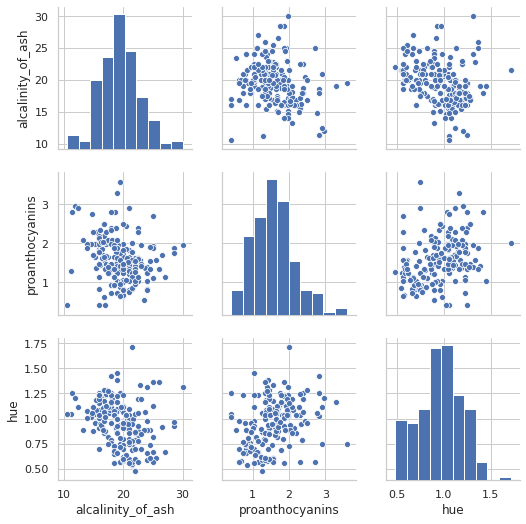

In [6]:
sns.set(font_scale=1, style='whitegrid')
features = ['alcalinity_of_ash', 'proanthocyanins', 'hue']
sns.pairplot(df, vars=features);

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [7]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    
    return sample.mean(axis=0)

In [8]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    mean = sample.mean(axis=0)
    return (sample - mean).T.dot(sample - mean) / sample.shape[0]

In [9]:
sample = df[features].values
mu = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

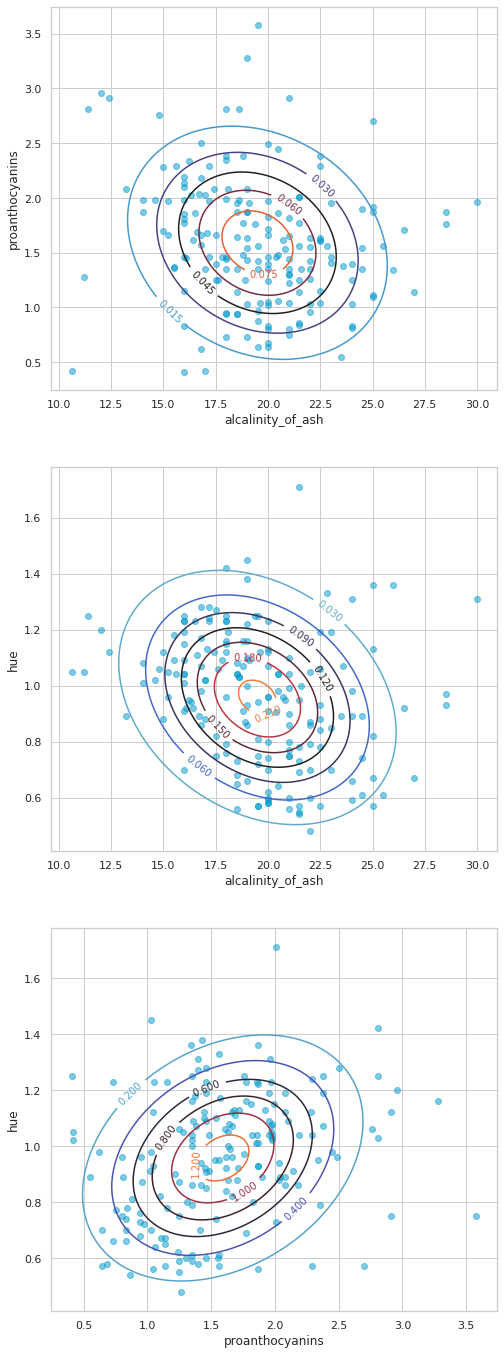

In [10]:
fig, axs = plt.subplots(3, figsize=(8, 24))
points_per_axis = 100

for k, (i, j) in enumerate([(0, 1), (0, 2), (1, 2)]):
    x = np.linspace(sample[:, i].min(), sample[:, i].max(), points_per_axis)
    y = np.linspace(sample[:, j].min(), sample[:, j].max(), points_per_axis)
    rv = sps.multivariate_normal(mean=mu[[i, j]], cov=sigma[[i, j]][:, [i, j]])
    xx, yy = np.meshgrid(x, y)
    pos = np.dstack((xx, yy))
    axs[k].scatter(sample[:, i], sample[:, j], color=blue, alpha=0.5)
    CS = axs[k].contour(xx, yy, rv.pdf(pos), cmap='icefire')
    axs[k].clabel(CS, inline=True, fontsize=10)
    axs[k].set_xlabel(features[i])
    axs[k].set_ylabel(features[j])

Сделайте вывод по задаче и предложите способ уточнения модели, возможно, добавив другие признаки.

**Выводы:** Распределение каждой из рассмотренных пар признаков похоже на двумерное нормальное. Возможно, что для улучшения модели, стоит избавиться от выбросов в данных.